In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from urllib.parse import urlparse

In [2]:
# Path to the folder containing CSV files on the remote server
remote_folder = "./results_checked_thumbnail_url_old"

dfs = []

for file_name in os.listdir(remote_folder):
    if file_name.endswith(".csv"):
        file_path = os.path.join(remote_folder, file_name)
        try:
            # Specify dtype to handle mixed types and low_memory to disable automatic type inference
            df = pd.read_csv(file_path, dtype=str, low_memory=False, lineterminator='\n')
            dfs.append(df)
        except Exception as e:
            print(f"Error reading file '{file_name}': {e}")

df_concat_videos = pd.concat(dfs, ignore_index=True)

In [3]:
df_concat_videos.head()

,CHANNEL_ID,VIDEO_ID,VIDEO_TITLE,VIDEO_VIEWS,VIDEO_PUBLISH_DATE,VIDEO_DESCRIPTION,VIDEO_KEYWORDS,VIDEO_LENGTH,VIDEO_RATING,VIDEO_LANGUAGE,VIDEO_THUMBNAIL_URL
0,UCRLO8HU2LWaMH6mjbQ1falQ,YksuTqqPniQ,Old Lady Falsely Arrested Under New Hate Crime...,45829,2024-04-19,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",557,NaN,en,https://i.ytimg.com/vi/YksuTqqPniQ/sddefault.jpg
1,UCRLO8HU2LWaMH6mjbQ1falQ,5blUxKHuveE,Humza Yousaf Plummets In Popularity Polls,81687,2024-04-19,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",544,NaN,en,https://i.ytimg.com/vi/5blUxKHuveE/sddefault.jpg
2,UCRLO8HU2LWaMH6mjbQ1falQ,XKdyERSsU8o,Conservative Conference Shut Down By Totalitar...,76338,2024-04-18,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",755,NaN,en,https://i.ytimg.com/vi/XKdyERSsU8o/sddefault.jpg
3,UCRLO8HU2LWaMH6mjbQ1falQ,-iSA2JnuBRA,Police Call Handlers Given Script To Defend Hu...,123556,2024-04-18,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",752,NaN,en,https://i.ytimg.com/vi/-iSA2JnuBRA/sddefault.jpg
4,UCRLO8HU2LWaMH6mjbQ1falQ,9M-iMMULA3Q,The Gimp Men Shall Rise,132060,2024-04-11,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",918,NaN,en,https://i.ytimg.com/vi/9M-iMMULA3Q/sddefault.jpg


In [4]:
def extract_domain(url):
    if isinstance(url, str):  # Ensure the URL is a string
        parsed_url = urlparse(url)
        return parsed_url.netloc
    return None

# Apply function to extract domains
df_concat_videos['domain'] = df_concat_videos['VIDEO_THUMBNAIL_URL'].apply(extract_domain)

In [5]:
distinct_domains = df_concat_videos['domain'].unique().tolist()
display(distinct_domains)

['i.ytimg.com', 'img.youtube.com', None]

In [6]:
df_concat_videos

,CHANNEL_ID,VIDEO_ID,VIDEO_TITLE,VIDEO_VIEWS,VIDEO_PUBLISH_DATE,VIDEO_DESCRIPTION,VIDEO_KEYWORDS,VIDEO_LENGTH,VIDEO_RATING,VIDEO_LANGUAGE,VIDEO_THUMBNAIL_URL,domain
0,UCRLO8HU2LWaMH6mjbQ1falQ,YksuTqqPniQ,Old Lady Falsely Arrested Under New Hate Crime...,45829,2024-04-19,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",557,NaN,en,https://i.ytimg.com/vi/YksuTqqPniQ/sddefault.jpg,i.ytimg.com
1,UCRLO8HU2LWaMH6mjbQ1falQ,5blUxKHuveE,Humza Yousaf Plummets In Popularity Polls,81687,2024-04-19,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",544,NaN,en,https://i.ytimg.com/vi/5blUxKHuveE/sddefault.jpg,i.ytimg.com
2,UCRLO8HU2LWaMH6mjbQ1falQ,XKdyERSsU8o,Conservative Conference Shut Down By Totalitar...,76338,2024-04-18,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",755,NaN,en,https://i.ytimg.com/vi/XKdyERSsU8o/sddefault.jpg,i.ytimg.com
3,UCRLO8HU2LWaMH6mjbQ1falQ,-iSA2JnuBRA,Police Call Handlers Given Script To Defend Hu...,123556,2024-04-18,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",752,NaN,en,https://i.ytimg.com/vi/-iSA2JnuBRA/sddefault.jpg,i.ytimg.com
4,UCRLO8HU2LWaMH6mjbQ1falQ,9M-iMMULA3Q,The Gimp Men Shall Rise,132060,2024-04-11,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",918,NaN,en,https://i.ytimg.com/vi/9M-iMMULA3Q/sddefault.jpg,i.ytimg.com
...,...,...,...,...,...,...,...,...,...,...,...,...
3393869,UCeKem7g09AKfD1KNR1ytjhA,yFrSvoDc3hg,FIVE STAR FAMILY: LARRY SOPHIEA,2424,2007-09-17,The Sophiea family emigrated to the US from Le...,"['pbs', 'dptv', 'detroit', 'public', 'tv', 'wa...",312,NaN,hi,https://i.ytimg.com/vi/yFrSvoDc3hg/hqdefault.jpg,i.ytimg.com
3393870,UCeKem7g09AKfD1KNR1ytjhA,QAZucEsYvq4,AN AMERICAN PILOT: ALEXANDER JEFFERSON,13848,2007-09-17,"Unbelievably, a time existed when conventional...","['pbs', 'dptv', 'detroit', 'public', 'tv', 'wa...",392,NaN,nl,https://i.ytimg.com/vi/QAZucEsYvq4/hqdefault.jpg,i.ytimg.com
3393871,UCeKem7g09AKfD1KNR1ytjhA,Ddy3G65SFwk,Create Channel Promo #1,2128,2007-08-22,"Looking for television's most popular how-to, ...","['Detroit', 'Public', 'TV', 'DPTV', 'dptv', 'p...",30,NaN,en,https://i.ytimg.com/vi/Ddy3G65SFwk/hqdefault.j...,i.ytimg.com
3393872,UCeKem7g09AKfD1KNR1ytjhA,W3raZjuC0Fw,Sesame Street Live 2008 - Elmo Makes Music!,116392,2007-08-22,Sesame Street Live 2008 - Elmo Makes Music! - ...,"['Detroit', 'Public', 'TV', 'DPTV', 'dptv', 'p...",60,NaN,en,https://i.ytimg.com/vi/W3raZjuC0Fw/hqdefault.jpg,i.ytimg.com


In [7]:
df_channels = pd.read_csv('data/checked_channels_V2.csv')

In [8]:
df_channels[df_channels["CHANNEL_AVAILABLE"] == "YES"].shape

(4857, 23)

In [9]:
df_channels.shape

(5692, 23)

In [10]:
df_channels['CHANNEL_IDEOLOGY'].unique()

array(['Anti-SJW', 'QAnon', 'Conspiracy', 'Religious Conservative',
       'Partisan Right', 'Black', 'LGBT', 'Libertarian', 'Social Justice',
       'Socialist', 'Partisan Left', 'MRA', 'Anti-theist',
       'White Identitarian'], dtype=object)

In [11]:
df_channels['CHANNEL_RELEVANCE'].unique()

array([1.        , 0.8       , 0.95      , 0.9       , 0.85      ,
       0.7       , 0.83333333, 0.93333333, 0.92      , 0.76666667,
       0.86666667, 0.33333333, 0.66      , 0.6       , 0.66666667,
       0.775     , 0.96666667, 0.63333333, 0.46666667, 0.75      ,
       0.925     , 0.5       , 0.73333333, 0.43333333, 0.98      ,
       0.65      ])

In [12]:
df_merged_complete = pd.merge(df_concat_videos, df_channels[['CHANNEL_ID', 'CHANNEL_TITLE', 'CHANNEL_COUNTRY', 'CHANNEL_RELEVANCE', 'CHANNEL_LR', 'CHANNEL_TAGS', 'CHANNEL_IDEOLOGY', 'CHANNEL_MEDIA', 'CHANNEL_LOGO_URL']], how='left', left_on='CHANNEL_ID', right_on='CHANNEL_ID')

In [13]:
df_merged_complete

,CHANNEL_ID,VIDEO_ID,VIDEO_TITLE,VIDEO_VIEWS,VIDEO_PUBLISH_DATE,VIDEO_DESCRIPTION,VIDEO_KEYWORDS,VIDEO_LENGTH,VIDEO_RATING,VIDEO_LANGUAGE,VIDEO_THUMBNAIL_URL,domain,CHANNEL_TITLE,CHANNEL_COUNTRY,CHANNEL_RELEVANCE,CHANNEL_LR,CHANNEL_TAGS,CHANNEL_IDEOLOGY,CHANNEL_MEDIA,CHANNEL_LOGO_URL
0,UCRLO8HU2LWaMH6mjbQ1falQ,YksuTqqPniQ,Old Lady Falsely Arrested Under New Hate Crime...,45829,2024-04-19,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",557,NaN,en,https://i.ytimg.com/vi/YksuTqqPniQ/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
1,UCRLO8HU2LWaMH6mjbQ1falQ,5blUxKHuveE,Humza Yousaf Plummets In Popularity Polls,81687,2024-04-19,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",544,NaN,en,https://i.ytimg.com/vi/5blUxKHuveE/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
2,UCRLO8HU2LWaMH6mjbQ1falQ,XKdyERSsU8o,Conservative Conference Shut Down By Totalitar...,76338,2024-04-18,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",755,NaN,en,https://i.ytimg.com/vi/XKdyERSsU8o/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
3,UCRLO8HU2LWaMH6mjbQ1falQ,-iSA2JnuBRA,Police Call Handlers Given Script To Defend Hu...,123556,2024-04-18,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",752,NaN,en,https://i.ytimg.com/vi/-iSA2JnuBRA/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
4,UCRLO8HU2LWaMH6mjbQ1falQ,9M-iMMULA3Q,The Gimp Men Shall Rise,132060,2024-04-11,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",918,NaN,en,https://i.ytimg.com/vi/9M-iMMULA3Q/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393869,UCeKem7g09AKfD1KNR1ytjhA,yFrSvoDc3hg,FIVE STAR FAMILY: LARRY SOPHIEA,2424,2007-09-17,The Sophiea family emigrated to the US from Le...,"['pbs', 'dptv', 'detroit', 'public', 'tv', 'wa...",312,NaN,hi,https://i.ytimg.com/vi/yFrSvoDc3hg/hqdefault.jpg,i.ytimg.com,Detroit Public TV,US,0.9,C,"[\n ""Black"",\n ""SocialJustice""\n]",Black,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVqP2j6XZeN_5A_...
3393870,UCeKem7g09AKfD1KNR1ytjhA,QAZucEsYvq4,AN AMERICAN PILOT: ALEXANDER JEFFERSON,13848,2007-09-17,"Unbelievably, a time existed when conventional...","['pbs', 'dptv', 'detroit', 'public', 'tv', 'wa...",392,NaN,nl,https://i.ytimg.com/vi/QAZucEsYvq4/hqdefault.jpg,i.ytimg.com,Detroit Public TV,US,0.9,C,"[\n ""Black"",\n ""SocialJustice""\n]",Black,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVqP2j6XZeN_5A_...
3393871,UCeKem7g09AKfD1KNR1ytjhA,Ddy3G65SFwk,Create Channel Promo #1,2128,2007-08-22,"Looking for television's most popular how-to, ...","['Detroit', 'Public', 'TV', 'DPTV', 'dptv', 'p...",30,NaN,en,https://i.ytimg.com/vi/Ddy3G65SFwk/hqdefault.j...,i.ytimg.com,Detroit Public TV,US,0.9,C,"[\n ""Black"",\n ""SocialJustice""\n]",Black,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVqP2j6XZeN_5A_...
3393872,UCeKem7g09AKfD1KNR1ytjhA,W3raZjuC0Fw,Sesame Street Live 2008 - Elmo Makes Music!,116392,2007-08-22,Sesame Street Live 2008 - Elmo Makes Music! - ...,"['Detroit', 'Public', 'TV', 'DPTV', 'dptv', 'p...",60,NaN,en,https://i.ytimg.com/vi/W3raZjuC0Fw/hqdefault.jpg,i.ytimg.com,Detroit Public TV,US,0.9,

In [14]:
df_merged_complete.dtypes

CHANNEL_ID              object
VIDEO_ID                object
VIDEO_TITLE             object
VIDEO_VIEWS             object
VIDEO_PUBLISH_DATE      object
VIDEO_DESCRIPTION       object
VIDEO_KEYWORDS          object
VIDEO_LENGTH            object
VIDEO_RATING            object
VIDEO_LANGUAGE          object
VIDEO_THUMBNAIL_URL     object
domain                  object
CHANNEL_TITLE           object
CHANNEL_COUNTRY         object
CHANNEL_RELEVANCE      float64
CHANNEL_LR              object
CHANNEL_TAGS            object
CHANNEL_IDEOLOGY        object
CHANNEL_MEDIA           object
CHANNEL_LOGO_URL        object
dtype: object

In [15]:
# df_merged_complete.to_csv('data/video_list.csv', index=False)

In [16]:
# dtype_dict = {
#     'CHANNEL_ID': str,
#     'VIDEO_ID': str, 
# }

# # Read CSV file with specified data types
# # df_video_list = pd.read_csv('data/video_list.csv', dtype=dtype_dict)
# df_video_list = pd.read_csv('data/video_list.csv', nrows=5)

In [17]:
# df_video_list

In [18]:
# columns_to_convert_str = ['CHANNEL_ID', 'VIDEO_ID', 'VIDEO_TITLE', 'VIDEO_DESCRIPTION', 'CHANNEL_TITLE', 'CHANNEL_COUNTRY', 'CHANNEL_LR', 'CHANNEL_IDEOLOGY', 'CHANNEL_MEDIA', 'CHANNEL_LOGO_URL']
# df_merged_complete[columns_to_convert_str] = df_merged_complete[columns_to_convert_str].astype(str)

In [19]:
# df_merged_complete.dtypes

In [20]:
len(df_merged_complete['CHANNEL_ID'].unique())

4704

In [21]:
df_merged_complete['CHANNEL_COUNTRY'].unique()

array(['GB', 'US', nan, 'EG', 'PH', 'AU', 'CA', 'NL', 'SE', 'JP', 'IE',
       'DE', 'AT', 'CO', 'NZ', 'CH', 'ID', 'VN', 'RU', 'PR', 'ZA', 'LT',
       'IT', 'KE', 'GU', 'NO', 'IN', 'SK', 'PT', 'FR', 'GR', 'AR', 'PK',
       'BR', 'PA', 'PL', 'ES', 'BE', 'IL', 'KZ', 'NG', 'SN', 'MX', 'MK',
       'AQ', 'IQ', 'TH', 'DK', 'IS', 'CN', 'CF', 'HU', 'KP', 'TZ', 'FI',
       'SI', 'DO', 'RO', 'TW', 'OM', 'RS', 'MY', 'HK', 'LK', 'BA', 'HR',
       'KR', 'JM', 'EE', 'EC', 'SG', 'GT', 'IM'], dtype=object)

In [22]:
df_merged_complete['VIDEO_LANGUAGE'].unique()

array(['en', 'hi', 'it', 'pt', 'de', 'nl', 'ur', 'fr', 'tr', 'sw', 'es',
       'pl', 'ar', 'bg', 'th', 'ru', 'el', 'zh', 'ja', nan, 'vi'],
      dtype=object)

In [23]:
df_merged_complete[df_merged_complete['VIDEO_LANGUAGE'] == 'pt']

,CHANNEL_ID,VIDEO_ID,VIDEO_TITLE,VIDEO_VIEWS,VIDEO_PUBLISH_DATE,VIDEO_DESCRIPTION,VIDEO_KEYWORDS,VIDEO_LENGTH,VIDEO_RATING,VIDEO_LANGUAGE,VIDEO_THUMBNAIL_URL,domain,CHANNEL_TITLE,CHANNEL_COUNTRY,CHANNEL_RELEVANCE,CHANNEL_LR,CHANNEL_TAGS,CHANNEL_IDEOLOGY,CHANNEL_MEDIA,CHANNEL_LOGO_URL
41,UCRLO8HU2LWaMH6mjbQ1falQ,0WYoTX5n8ek,Nicholas Rossi US Trial Begins,56966,2024-01-25,Go to https://ground.news/dankula2 to stay ful...,"['news', 'articles', 'comedy', 'dankula', 'cou...",528,NaN,pt,https://i.ytimg.com/vi/0WYoTX5n8ek/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
67,UCRLO8HU2LWaMH6mjbQ1falQ,xJOLc-haev4,A Horse Got Loose On A Plane,35557,2023-11-24,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",285,NaN,pt,https://i.ytimg.com/vi/xJOLc-haev4/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
68,UCRLO8HU2LWaMH6mjbQ1falQ,RnyR8HrxkAA,TikTok Bans The Bin Laden Letter,52829,2023-11-23,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",550,NaN,pt,https://i.ytimg.com/vi/RnyR8HrxkAA/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
318,UCRLO8HU2LWaMH6mjbQ1falQ,5BM1sy7RZi8,Musk Refuses To Let Alex Jones Back On Twitter,69113,2022-11-22,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",892,NaN,pt,https://i.ytimg.com/vi/5BM1sy7RZi8/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
320,UCRLO8HU2LWaMH6mjbQ1falQ,4Y4bs33RO8Y,Man Arrested For Calling Humza Yousaf A Racist,101532,2022-11-17,=====\nLINKS\n=====\n\nPayPal Donations : http...,"['news', 'articles', 'comedy', 'dankula', 'cou...",675,NaN,pt,https://i.ytimg.com/vi/4Y4bs33RO8Y/sddefault.jpg,i.ytimg.com,Count Dankula 2 : Electric Boogaloo,GB,1.0,R,"[\n ""AntiSJW"",\n ""Libertarian""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU77q6iWO8PinYo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393771,UCeKem7g09AKfD1KNR1ytjhA,K_ub7Fa6VO8,RickSteves2.mov,470,2010-02-09,Rick Steves is coming to Detroit Public TV on ...,"['dptv', 'detroit public tv', 'DPTV', 'Rick St...",35,NaN,pt,https://i.ytimg.com/vi/K_ub7Fa6VO8/hqdefault.jpg,i.ytimg.com,Detroit Public TV,US,0.9,C,"[\n ""Black"",\n ""SocialJustice""\n]",Black,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVqP2j6XZeN_5A_...
3393783,UCeKem7g09AKfD1KNR1ytjhA,IlFt5L5y57w,Daniel O'Donnell,5339,2009-11-19,Check out our collection of Daniel products: h...,"[""daniel o'donnell"", ""Danny O'Donnell"", ""Danie...",45,NaN,pt,https://i.ytimg.com/vi/IlFt5L5y57w/hqdefault.jpg,i.ytimg.com,Detroit Public TV,US,0.9,C,"[\n ""Black"",\n ""SocialJustice""\n]",Black,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVqP2j6XZeN_5A_...
3393800,UCeKem7g09AKfD1KNR1ytjhA,iGUZS5q6aN0,DPTV Media Shop Daniel O'Donnell,1850,2009-03-31,Host of Daniel O'Donnell products are availabl...,"['Daniel', ""O'Donnell;"", 'Detroit', 'Public', ...",60,NaN,pt,https://i.ytimg.com/vi/iGUZS5q6aN0/hqdefault.jpg,i.ytimg.com,Detroit Public TV,US,0.9,C,"[\n ""Black"",\n ""SocialJustice""\n]",Black,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVqP2j6XZeN_5A_...
3393809,UCeKem7g09AKfD1KNR1ytjhA,dK5Huu11cgw,My Source - Jim Gilmore Professor at UM - Dear...,237,2009-01-06,Talks about his experience working with his st...,"['Election', 'UM Dearborn', 'Mi Vote', 'Studen...",60,NaN,pt,https://i.ytimg.com/vi/dK5Huu11cgw/hqdefault.jpg,i.ytimg.com,Detroit Public TV,US,0.9,C,"[\n ""Black"",\n ""SocialJustice""\n]",Black,You

In [24]:
# df_merged_complete[df_merged_complete['CHANNEL_COUNTRY'] == 'MY']

In [25]:
# from transformers import pipeline
# from tqdm import tqdm
# import torch

# # Check if CUDA (GPU support) is available
# if torch.cuda.is_available():
#     # Set the device to use GPU
#     device = 5  # You can specify the GPU device index here (e.g., 0 for GPU 0)
#     print(f'Using GPU: {device}')
# else:
#     device = -1  # Use CPU if GPU is not available
#     print('Using CPU')

# # Initialize the language detection pipeline with the specified device
# model_ckpt = "papluca/xlm-roberta-base-language-detection"
# pipe = pipeline("text-classification", model=model_ckpt, device=device)

In [26]:
# # Function to detect language and return if it is English or not
# def detect_language(text):
#     result = pipe(text, top_k=1, truncation=True)
#     language = result[0]['label']
#     return language

# # Apply the language detection function to the 'VIDEO_TITLE' column
# # Use tqdm to track progress
# tqdm.pandas(desc="Detecting languages")
# df_merged_complete['VIDEO_LANGUAGE'] = df_merged_complete['VIDEO_TITLE'].progress_apply(detect_language)

In [27]:
df_merged_complete['VIDEO_LENGTH'] = pd.to_numeric(df_merged_complete['VIDEO_LENGTH'], errors='coerce')
df_merged_complete['CHANNEL_RELEVANCE'] = pd.to_numeric(df_merged_complete['CHANNEL_RELEVANCE'], errors='coerce')
df_merged_complete['VIDEO_VIEWS'] = pd.to_numeric(df_merged_complete['VIDEO_VIEWS'], errors='coerce')
df_merged_complete['VIDEO_PUBLISH_DATE'] = pd.to_datetime(df_merged_complete['VIDEO_PUBLISH_DATE'])

In [28]:
# df_merged_complete_filtered = df_merged_complete[(df_merged_complete['VIDEO_LENGTH'] <= 600) & (df_merged_complete['CHANNEL_RELEVANCE'] >= 0.95)]

In [29]:
# df_merged_complete_filtered

In [30]:
unique_ideologies = df_merged_complete['CHANNEL_IDEOLOGY'].unique()

# Sort the unique ideologies alphabetically
sorted_ideologies = sorted(unique_ideologies)

In [31]:
# plt.figure(figsize=(20, 5))
# ax1 = sns.countplot(data=df_merged_complete_filtered, x='CHANNEL_IDEOLOGY', color='blue', palette='Accent', order=sorted_ideologies)
# plt.title('Ideology Video distribution')
# plt.xlabel('Ideology')
# plt.ylabel('Count')

# # Add total count text on top of each bar
# for p in ax1.patches:
#     ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize=10, color='black', xytext = (0, 5), textcoords = 'offset points')

# plt.tight_layout()
# plt.show()

In [32]:
# # Convert the publish date column to datetime if needed
# df_merged_complete_filtered['VIDEO_PUBLISH_DATE'] = pd.to_datetime(df_merged_complete_filtered['VIDEO_PUBLISH_DATE'])

# # Extract the year from the publish date
# df_merged_complete_filtered['PUBLISH_YEAR'] = df_merged_complete_filtered['VIDEO_PUBLISH_DATE'].dt.year

# # Plot the distribution of publish year using Seaborn
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df_merged_complete_filtered, x='PUBLISH_YEAR', palette='viridis')
# plt.xlabel('Year')
# plt.ylabel('Number of Videos Published')
# plt.title('Distribution of Publish Year of YouTube Videos')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

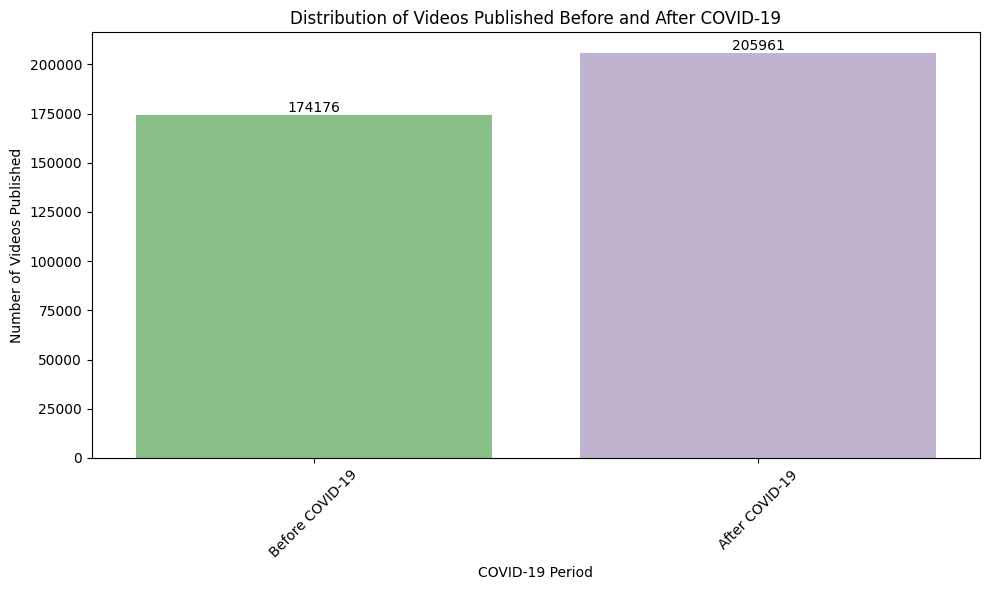

In [33]:
df_merged_complete_filtered = df_merged_complete[(df_merged_complete['VIDEO_LENGTH'] <= 1200) & (df_merged_complete['CHANNEL_RELEVANCE'] >= 0.9)]
# df_merged_complete_filtered = df_merged_complete[(df_merged_complete['VIDEO_LENGTH'] <= 1200)]

# Define the time periods for Before, During, and After COVID-19
before_covid_period = df_merged_complete_filtered[(df_merged_complete_filtered['VIDEO_PUBLISH_DATE'] >= pd.to_datetime('2019-02-01')) & (df_merged_complete_filtered['VIDEO_PUBLISH_DATE'] <= pd.to_datetime('2020-01-31'))]
after_covid_period = df_merged_complete_filtered[(df_merged_complete_filtered['VIDEO_PUBLISH_DATE'] >= pd.to_datetime('2020-02-01')) & (df_merged_complete_filtered['VIDEO_PUBLISH_DATE'] <= pd.to_datetime('2021-01-31'))]

# Concatenate the periods for plotting
concatenated_periods = pd.concat([before_covid_period.assign(period='Before COVID-19'),
                                  after_covid_period.assign(period='After COVID-19')])

# Plot the distribution using Seaborn
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(data=concatenated_periods, x='period', palette='Accent')
plt.xlabel('COVID-19 Period')
plt.ylabel('Number of Videos Published')
plt.title('Distribution of Videos Published Before and After COVID-19')
plt.xticks(rotation=45)

# Add total count text on top of each bar
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize=10, color='black', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

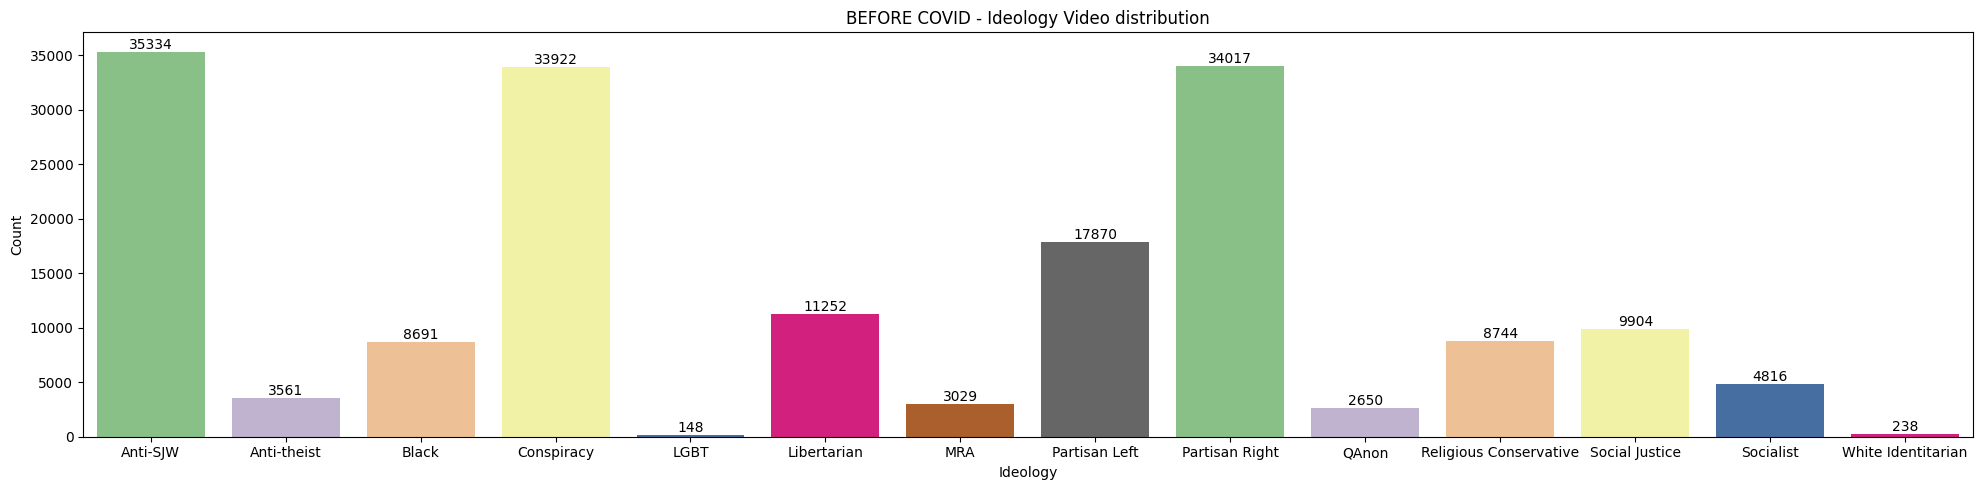

In [34]:
plt.figure(figsize=(20, 5))
ax1 = sns.countplot(data=before_covid_period, x='CHANNEL_IDEOLOGY', color='blue', palette='Accent', order=sorted_ideologies)
plt.title('BEFORE COVID - Ideology Video distribution')
plt.xlabel('Ideology')
plt.ylabel('Count')

# Add total count text on top of each bar
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize=10, color='black', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

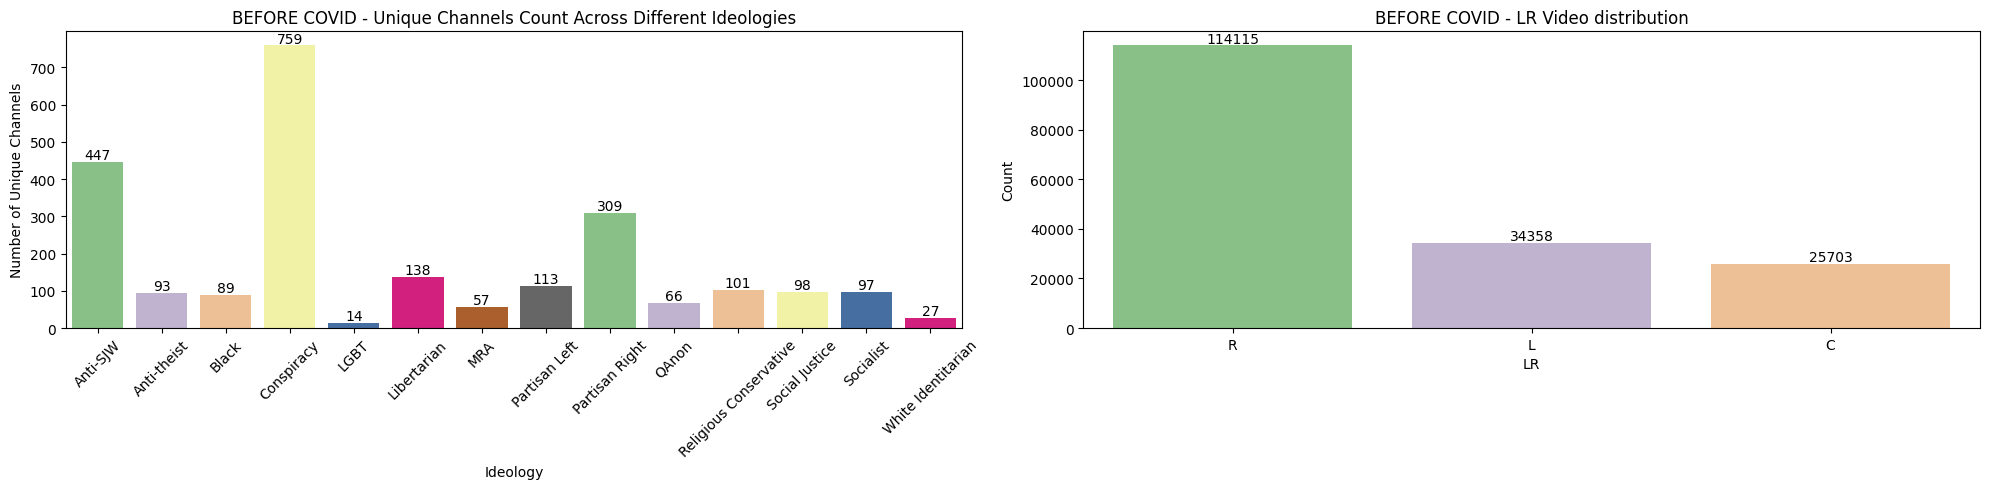

In [35]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plot 1: Unique Channels Count Across Different Ideologies
unique_channel_counts = before_covid_period.groupby('CHANNEL_IDEOLOGY')['CHANNEL_ID'].nunique().reset_index()
sns.barplot(data=unique_channel_counts, x='CHANNEL_IDEOLOGY', y='CHANNEL_ID', palette='Accent', ax=axes[0], order=sorted_ideologies)
axes[0].set_xlabel('Ideology')
axes[0].set_ylabel('Number of Unique Channels')
axes[0].set_title('BEFORE COVID - Unique Channels Count Across Different Ideologies')
axes[0].tick_params(axis='x', rotation=45)

# Add total count text on top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Plot 2: LR Video Distribution
sns.countplot(data=before_covid_period, x='CHANNEL_LR', color='blue', palette='Accent', ax=axes[1])
axes[1].set_title('BEFORE COVID - LR Video distribution')
axes[1].set_xlabel('LR')
axes[1].set_ylabel('Count')

# Add total count text on top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

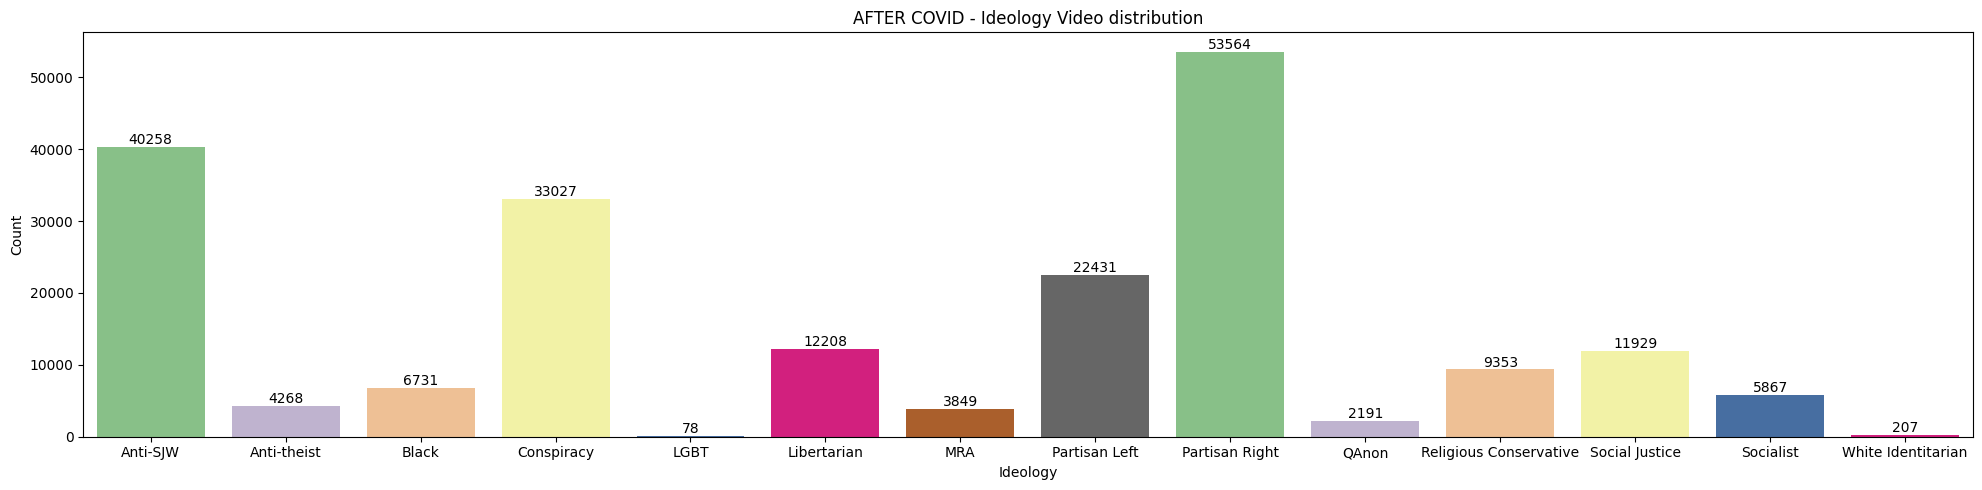

In [36]:
plt.figure(figsize=(20, 5))
ax1 = sns.countplot(data=after_covid_period, x='CHANNEL_IDEOLOGY', color='blue', palette='Accent', order=sorted_ideologies)
plt.title('AFTER COVID - Ideology Video distribution')
plt.xlabel('Ideology')
plt.ylabel('Count')

# Add total count text on top of each bar
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize=10, color='black', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

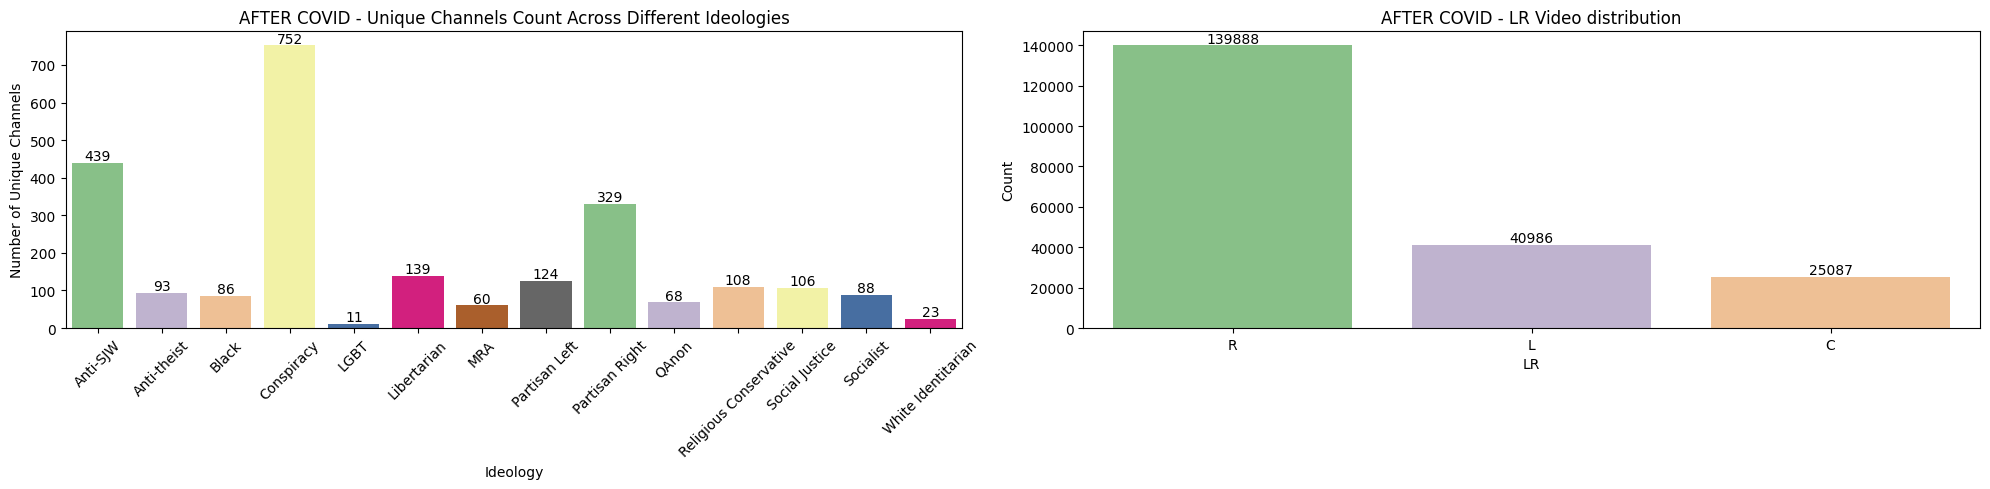

In [37]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plot 1: Unique Channels Count Across Different Ideologies
unique_channel_counts = after_covid_period.groupby('CHANNEL_IDEOLOGY')['CHANNEL_ID'].nunique().reset_index()
sns.barplot(data=unique_channel_counts, x='CHANNEL_IDEOLOGY', y='CHANNEL_ID', palette='Accent', ax=axes[0], order=sorted_ideologies)
axes[0].set_xlabel('Ideology')
axes[0].set_ylabel('Number of Unique Channels')
axes[0].set_title('AFTER COVID - Unique Channels Count Across Different Ideologies')
axes[0].tick_params(axis='x', rotation=45)

# Add total count text on top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Plot 2: LR Video Distribution
sns.countplot(data=after_covid_period, x='CHANNEL_LR', color='blue', palette='Accent', ax=axes[1])
axes[1].set_title('AFTER COVID - LR Video distribution')
axes[1].set_xlabel('LR')
axes[1].set_ylabel('Count')

# Add total count text on top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
# # Aggregate total views per channel
# channel_views = before_covid_period.groupby(['CHANNEL_ID', 'CHANNEL_IDEOLOGY']).agg({
#     'VIDEO_VIEWS': 'sum',
#     'CHANNEL_TITLE': 'first',
#     'CHANNEL_RELEVANCE': 'first',
#     'VIDEO_ID': 'count'
# }).reset_index()

In [39]:
# # Group by '_ideology' and get the video with max views
# filtered_length_df_before = before_covid_period[before_covid_period['VIDEO_LENGTH'] >= 300]

# # Now from those, get the video with max length
# result_before = filtered_length_df_before.loc[filtered_length_df_before.groupby('CHANNEL_IDEOLOGY')['VIDEO_VIEWS'].idxmax()].reset_index(drop=True)

# display(result_before)

In [40]:
# # Group by '_ideology' and get the video with max views
# filtered_length_df_after = after_covid_period[after_covid_period['VIDEO_LENGTH'] >= 300]

# # Now from those, get the video with max length
# result_after = filtered_length_df_after.loc[filtered_length_df_after.groupby('CHANNEL_IDEOLOGY')['VIDEO_VIEWS'].idxmax()].reset_index(drop=True)

# display(result_after)

In [41]:
def get_top_videos_per_ideology(df, top_channels_count, top_videos_per_channel, exclude_channels):
    top_videos_list = []

    for ideology in df['CHANNEL_IDEOLOGY'].unique():
        # Filter for the current ideology
        ideology_df = df[df['CHANNEL_IDEOLOGY'] == ideology]
        
        # Exclude specific channels
        ideology_df = ideology_df[~ideology_df['CHANNEL_ID'].isin(exclude_channels)]
        
        # Get top channels by total video views for this ideology
        top_channels = ideology_df.groupby('CHANNEL_ID').agg({'VIDEO_VIEWS': 'sum'}).nlargest(top_channels_count, 'VIDEO_VIEWS').reset_index()
        
        for channel in top_channels['CHANNEL_ID']:
            # Get the channel title
            channel_title = ideology_df[ideology_df['CHANNEL_ID'] == channel]['CHANNEL_TITLE'].iloc[0]
            
            # Get top videos for each channel
            channel_videos = df[(df['CHANNEL_ID'] == channel) & (df['CHANNEL_IDEOLOGY'] == ideology)].nlargest(top_videos_per_channel, 'VIDEO_VIEWS')
            top_videos_list.append(channel_videos)
    
    # Concatenate all top videos
    top_videos_df = pd.concat(top_videos_list).reset_index(drop=True)
    
    return top_videos_df

# Specify the number of top channels and top videos per channel
top_channels_count = 50
top_videos_per_channel = 10

# List of channels to exclude
exclude_channels = [
    "UCiR1ENB-iT-nKUAppzkaMSw",
    "UCsgdISZURLDMHNlm07UIp_A",
    "UCRzH94GUt3k2Vrwlk_SMkFg",
    "UC5JTfy24J7STy5lwDeNHq6g",
    "UCWQdudc_cnIaRG1PmD1Ymbg",
    "UCMkVJrQM6YRUymwGamEJNNA",
    "UCFvCXi0IVpWTM7Srj6hDDqw",
    "UC8mPXcJigRMDx3UaKTtI-Rg"
]

# Get the top videos
before_covid_top_videos_df = get_top_videos_per_ideology(before_covid_period, top_channels_count, top_videos_per_channel, exclude_channels)
after_covid_top_videos_df = get_top_videos_per_ideology(after_covid_period, top_channels_count, top_videos_per_channel, exclude_channels)

# Group by CHANNEL_IDEOLOGY to get the number of videos per ideology
before_covid_videos_per_ideology = before_covid_top_videos_df.groupby('CHANNEL_IDEOLOGY').size().reset_index(name='VIDEO_COUNT')
after_covid_videos_per_ideology = after_covid_top_videos_df.groupby('CHANNEL_IDEOLOGY').size().reset_index(name='VIDEO_COUNT')

# Group by CHANNEL_IDEOLOGY and count unique CHANNEL_ID to get the number of channels per ideology
before_covid_channels_per_ideology = before_covid_top_videos_df.groupby('CHANNEL_IDEOLOGY')['CHANNEL_ID'].nunique().reset_index(name='CHANNEL_COUNT')
after_covid_channels_per_ideology = after_covid_top_videos_df.groupby('CHANNEL_IDEOLOGY')['CHANNEL_ID'].nunique().reset_index(name='CHANNEL_COUNT')

# Group by CHANNEL_IDEOLOGY and get the unique relevance scores
before_covid_relevance_per_ideology = before_covid_top_videos_df.groupby('CHANNEL_IDEOLOGY')['CHANNEL_RELEVANCE'].unique().reset_index()
after_covid_relevance_per_ideology = after_covid_top_videos_df.groupby('CHANNEL_IDEOLOGY')['CHANNEL_RELEVANCE'].unique().reset_index()

# Merge the two results to get a combined view
before_covid_ideology_summary = pd.merge(before_covid_videos_per_ideology, before_covid_channels_per_ideology, on='CHANNEL_IDEOLOGY')
before_covid_ideology_summary = pd.merge(before_covid_ideology_summary, before_covid_relevance_per_ideology, on='CHANNEL_IDEOLOGY')

after_covid_ideology_summary = pd.merge(after_covid_videos_per_ideology, after_covid_channels_per_ideology, on='CHANNEL_IDEOLOGY')
after_covid_ideology_summary = pd.merge(after_covid_ideology_summary, after_covid_relevance_per_ideology, on='CHANNEL_IDEOLOGY')

# Display the results
print(before_covid_ideology_summary)
print(before_covid_top_videos_df.shape)

print(after_covid_ideology_summary)
print(after_covid_top_videos_df.shape)

# # Export the resulting DataFrame to a CSV file
# before_covid_top_videos_df.to_csv('before_covid_top_videos_df.csv', index=False)
# after_covid_top_videos_df.to_csv('after_covid_top_videos_df.csv', index=False)

          CHANNEL_IDEOLOGY  VIDEO_COUNT  CHANNEL_COUNT  \
0                 Anti-SJW          496             50   
1              Anti-theist          452             50   
2                    Black          460             50   
3               Conspiracy          498             50   
4                     LGBT           94             13   
5              Libertarian          494             50   
6                      MRA          444             50   
7            Partisan Left          491             50   
8           Partisan Right          495             50   
9                    QAnon          410             50   
10  Religious Conservative          480             50   
11          Social Justice          443             50   
12               Socialist          409             50   
13      White Identitarian          142             26   

                       CHANNEL_RELEVANCE  
0          [0.9, 1.0, 0.98, 0.95, 0.925]  
1                       [1.0, 0.9, 0.95]  


In [42]:
pd.set_option('display.max_rows', None)

display(before_covid_top_videos_df.loc[before_covid_top_videos_df["VIDEO_LANGUAGE"] != "en"])
display(after_covid_top_videos_df.loc[after_covid_top_videos_df["VIDEO_LANGUAGE"] != "en"])

,CHANNEL_ID,VIDEO_ID,VIDEO_TITLE,VIDEO_VIEWS,VIDEO_PUBLISH_DATE,VIDEO_DESCRIPTION,VIDEO_KEYWORDS,VIDEO_LENGTH,VIDEO_RATING,VIDEO_LANGUAGE,VIDEO_THUMBNAIL_URL,domain,CHANNEL_TITLE,CHANNEL_COUNTRY,CHANNEL_RELEVANCE,CHANNEL_LR,CHANNEL_TAGS,CHANNEL_IDEOLOGY,CHANNEL_MEDIA,CHANNEL_LOGO_URL
1,UCnxGkOGNMqQEUMvroOWps6Q,9ugC3TXSKoE,Could You Make Tropic Thunder Today? w/Robert ...,13176560,2020-01-15,Taken from JRE #1411 w/Robert Downey Jr :\nhtt...,"['Joe Rogan', 'JRE', 'Joe Rogan Experience', '...",664,NaN,pl,https://i.ytimg.com/vi/9ugC3TXSKoE/sddefault.jpg,i.ytimg.com,JRE Clips,US,0.900000,C,"[\n ""AntiSJW""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJUOHWDvavqUIJfE...
57,UCJNky9LM9wx0cmWfrg5eUcw,hWbbICtXyHs,Norm Macdonald is an UNDERRATED Interviewer,2260529,2019-12-02,Turd Ferguson's Merch : https://teespring.com/...,[],626,NaN,nl,https://i.ytimg.com/vi/hWbbICtXyHs/sddefault.jpg,i.ytimg.com,I'm not Norm,NaN,0.900000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/606fqOEUzxpLTmXsseE0TzsY...
59,UCJNky9LM9wx0cmWfrg5eUcw,6GFIV4T-Z_Q,Sexist Jokes Compilation,2038302,2019-08-18,Check out these cool shirts and hoodies: https...,[],1191,NaN,ur,https://i.ytimg.com/vi/6GFIV4T-Z_Q/sddefault.jpg,i.ytimg.com,I'm not Norm,NaN,0.900000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/606fqOEUzxpLTmXsseE0TzsY...
61,UCzUV5283-l5c0oKRtyenj6Q,s7CueoDwZsI,Jim Acosta Meets Mark Dice (Again),787065,2019-07-16,👕 Order your shirts here: https://Teespring.co...,"['Funny', 'Entertainment', 'Fun', 'Laughing', ...",203,NaN,it,https://i.ytimg.com/vi/s7CueoDwZsI/sddefault.jpg,i.ytimg.com,Mark Dice,US,1.000000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU4aHGUIf0C66rx...
65,UCzUV5283-l5c0oKRtyenj6Q,FXyKxff2X_k,Bad News for Chunk Yogurt,537884,2019-10-30,👕 Order your shirts here: https://Teespring.co...,"['Funny', 'Entertainment', 'Fun', 'Laughing', ...",328,NaN,sw,https://i.ytimg.com/vi/FXyKxff2X_k/sddefault.jpg,i.ytimg.com,Mark Dice,US,1.000000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU4aHGUIf0C66rx...
67,UCzUV5283-l5c0oKRtyenj6Q,ySA77Z5VBS4,IMPEACHMENT HAS BACKFIRED!,505833,2019-12-19,👕 Order your shirts here: https://Teespring.co...,"['Funny', 'Entertainment', 'Fun', 'Laughing', ...",475,NaN,de,https://i.ytimg.com/vi/ySA77Z5VBS4/sddefault.jpg,i.ytimg.com,Mark Dice,US,1.000000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJU4aHGUIf0C66rx...
70,UCGy6uV7yqGWDeUWTZzT3ZEg,r8SyoRwV_To,What do you think of Greta Thunberg's plastic ...,1780114,2019-12-11,http://bit.ly/2LK2scP Keean Bexte of Rebel New...,"['news', 'Rebel News', 'Rebel Media', 'greta t...",343,NaN,NaN,NaN,None,Rebel News,CA,0.900000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVQG-Qt6IrmORGo...
71,UCGy6uV7yqGWDeUWTZzT3ZEg,dSH-x6DhfW0,Greta Thunberg and her handlers run from quest...,1744035,2019-10-17,http://www.HowDareYou.ca Keean Bexte of Rebel ...,"['news', 'Rebel News', 'Rebel Media', 'keean b...",584,NaN,NaN,NaN,None,Rebel News,CA,0.900000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVQG-Qt6IrmORGo...
72,UCGy6uV7yqGWDeUWTZzT3ZEg,u7HdBJdQSjs,Greta Thunberg meets first real resistance dur...,874881,2019-10-18,http://www.HowDareYou.ca\n\nhttp://bit.ly/2P2u...,"['news', 'Rebel News', 'Rebel Media', 'greta t...",383,NaN,NaN,NaN,None,Rebel News,CA,0.900000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVQG-Qt6IrmORGo...
73,UCGy6uV7yqGWDeUWTZzT3ZEg,20t74vKoiEs,Leftist Student Has MELTDOWN When Arrested | R...,772623,2019-05-03,Rob Shimshock of Campus Unmasked thinks you sh...,"['news', 'Rebel Media', 'RebelMedia', 'Rob Shi...",188,NaN,NaN,NaN,None,Rebel News,CA,0.900000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.g

,CHANNEL_ID,VIDEO_ID,VIDEO_TITLE,VIDEO_VIEWS,VIDEO_PUBLISH_DATE,VIDEO_DESCRIPTION,VIDEO_KEYWORDS,VIDEO_LENGTH,VIDEO_RATING,VIDEO_LANGUAGE,VIDEO_THUMBNAIL_URL,domain,CHANNEL_TITLE,CHANNEL_COUNTRY,CHANNEL_RELEVANCE,CHANNEL_LR,CHANNEL_TAGS,CHANNEL_IDEOLOGY,CHANNEL_MEDIA,CHANNEL_LOGO_URL
32,UCnQC_G5Xsjhp9fEJKuIcrSw,TBDfMQ27Asw,Ben Shapiro DEBUNKS Viral 'Systemic Racism Exp...,4563646,2020-06-09,I take a look at some of the arguments made in...,"['ben shapiro', 'shapiro', 'ben shapiro show',...",1070,NaN,pt,https://i.ytimg.com/vi/TBDfMQ27Asw/sddefault.jpg,i.ytimg.com,Ben Shapiro,US,1.000000,R,"[\n ""AntiSJW"",\n ""PartisanRight"",\n ""Religi...",Anti-SJW,YouTube,https://yt3.ggpht.com/V7tykN38akg15o4vKzxDv3rI...
35,UCnQC_G5Xsjhp9fEJKuIcrSw,QQod6F-UOu8,Ben Shapiro Reacts to Ben Shapiro Meme Videos,3877943,2020-07-11,"If you enjoyed this video, be sure to give it ...","['ben shapiro', 'shapiro', 'ben shapiro show',...",738,NaN,pt,https://i.ytimg.com/vi/QQod6F-UOu8/sddefault.jpg,i.ytimg.com,Ben Shapiro,US,1.000000,R,"[\n ""AntiSJW"",\n ""PartisanRight"",\n ""Religi...",Anti-SJW,YouTube,https://yt3.ggpht.com/V7tykN38akg15o4vKzxDv3rI...
42,UCaiVt4r6YLPzJVgr7pOmD6w,D91GzDIzcaA,Simp gets HUMILIATED by his long time crush,3309374,2020-05-21,Original vid --- https://www.youtube.com/watch...,"['aba preach', 'reaction', 'THE CUT', 'me and ...",1065,NaN,pt,https://i.ytimg.com/vi/D91GzDIzcaA/sddefault.jpg,i.ytimg.com,Aba N Preach,CA,0.900000,R,"[\n ""AntiSJW""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/PfBSnNPyQSHMwKAg2OT0mz_t...
49,UCaiVt4r6YLPzJVgr7pOmD6w,XrkDvnysgpM,SHE DESTROYED HER HUSBAND ON LIVE TELEVISION F...,2103772,2020-11-15,Merchandise --- https://www.enkreprinte.com/c...,"['aba preach', 'reaction']",1179,NaN,hi,https://i.ytimg.com/vi/XrkDvnysgpM/sddefault.jpg,i.ytimg.com,Aba N Preach,CA,0.900000,R,"[\n ""AntiSJW""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/PfBSnNPyQSHMwKAg2OT0mz_t...
62,UCaYw_yJ_YLPEv6zR2c7hgHA,sjCzJyFKoqo,UPDATES in AHMAUD ARBERY'S CASE ARE DISTURBING,2436087,2020-05-10,UPDATES in AHMAUD ARBERY'S CASE ARE DISTURBING...,"[""UPDATES in AHMAUD ARBERY'S CASE ARE DISTURBI...",878,NaN,it,https://i.ytimg.com/vi/sjCzJyFKoqo/sddefault.jpg,i.ytimg.com,The Officer Tatum,US,0.950000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/66gOMvNSwcpwQMgrlg47XGnA...
67,UCaYw_yJ_YLPEv6zR2c7hgHA,Z4s_iGZAWf0,NFAC LEADERS WILL REGRET MAKING THIS VIDEO,1194464,2020-07-29,NFAC LEADERS WILL REGRET MAKING THIS VIDEO\n\n...,['NFAC LEADERS WILL REGRET MAKING THIS VIDEO'],462,NaN,ur,https://i.ytimg.com/vi/Z4s_iGZAWf0/sddefault.j...,i.ytimg.com,The Officer Tatum,US,0.950000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/66gOMvNSwcpwQMgrlg47XGnA...
100,UCGy6uV7yqGWDeUWTZzT3ZEg,VCt0y_Ala60,Charges DROPPED against Alberta teen farmer af...,1697403,2020-09-30,►Help support independent journalism: http://w...,"['Rebel News', 'conservative', 'Canada', 'keea...",1003,NaN,NaN,NaN,None,Rebel News,CA,0.900000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVQG-Qt6IrmORGo...
101,UCGy6uV7yqGWDeUWTZzT3ZEg,kLzCkf6mebw,"Black Lives Matter invades Alberta town, can’t...",1243943,2020-06-15,Support our http://www.JournalistDefenceFund.c...,"['news', 'Rebel News', 'conservative', 'Canada...",1155,NaN,NaN,NaN,None,Rebel News,CA,0.900000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVQG-Qt6IrmORGo...
102,UCGy6uV7yqGWDeUWTZzT3ZEg,gYnLcOqk19Q,HELP JEREMIA: Alberta Sheriffs Pull Teenager F...,813536,2020-08-12,►https://www.gofundme.com/f/leussink-farms-jus...,"['news', 'Rebel News', 'conservative', 'Canada...",720,NaN,NaN,NaN,None,Rebel News,CA,0.900000,R,"[\n ""AntiSJW"",\n ""PartisanRight""\n]",Anti-SJW,YouTube,https://yt3.ggpht.com/ytc/AL5GRJVQG-Qt6IrmORGo...
103,UCGy6uV7yqGWDeUWTZzT3ZEg,k47CY02NHvI,Anti-police cafe signage prompts backlash; own...,732980,2020-06-22,A Toronto restaurant owner seems to be i